In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/My Drive/COMAP2022/stl-bchain.csv")
data

,Date,Value,trend,seasonal,Day of week,Return,up_down,Minimum,Maximum
0,2016-09-11,621.65,611.382418,5.197696,7,NaN,0,621.65,621.65
1,2016-09-12,609.67,611.267635,0.202148,1,-0.019271,0,607.04,611.58
2,2016-09-13,610.92,611.615960,-0.121453,2,0.002050,1,607.04,611.58
3,2016-09-14,608.82,610.649613,-0.657500,3,-0.003437,0,607.04,611.58
4,2016-09-15,610.38,609.923658,-1.226896,4,0.002562,1,607.04,611.58
...,...,...,...,...,...,...,...,...,...
1821,2021-09-06,51769.06,49974.612095,1048.831788,1,0.036472,1,0.00,0.00
1822,2021-09-07,52677.40,49381.269650,1755.088978,2,0.017546,1,0.00,0.00
1823,2021-09-08,46809.17,48821.899912,-1301.098269,3,-0.111399,0,0.00,0.00
1824,2021-09-09,46078.38,49079.883855,-1695.471405,4,-0.015612,0,0.00,0.00


In [ ]:
data.columns

Index(['Date', 'Value', 'trend', 'seasonal', 'Day of week', 'Return',
       'up_down', 'Minimum', 'Maximum'],
      dtype='object')

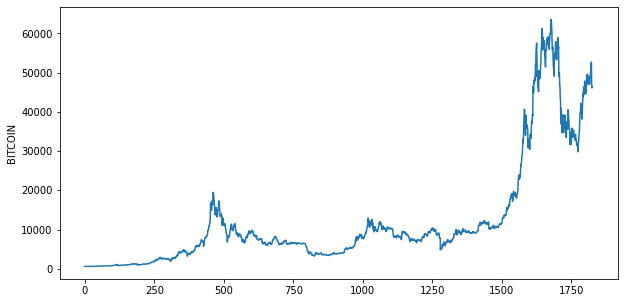

In [ ]:
plt.ylabel("BITCOIN")

# Setting the size of our graph
data.Value.plot(figsize=(10,5))

In [ ]:
X=data[['trend', 'seasonal', 'Day of week',
       'up_down', 'Minimum', 'Maximum']]

In [ ]:
data['MA3'] = data['Value'].shift(1).rolling(window=3).mean()
data['MA9']= data['Value'].shift(1).rolling(window=9).mean()

In [ ]:
data = data.dropna()

In [ ]:
y = data['Value']

In [ ]:
training = 0.8
t = int(training*len(data))

# Training dataset
X_train = X[:t]
y_train = y[:t]

# Testing dataset
X_test = X[t:]
y_test = y[t:]

In [ ]:
model = LinearRegression().fit(X_train,y_train)

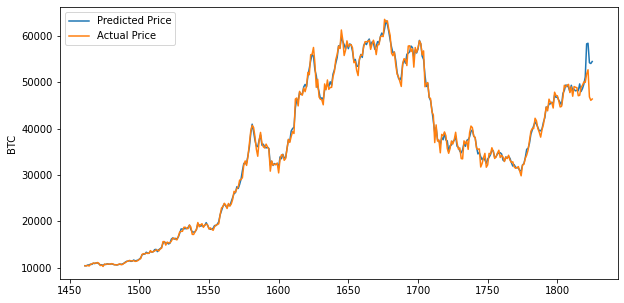

In [ ]:
predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])
predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("BTC")
plt.show()

In [ ]:
 #Computing the accuracy of our model
R_squared_score =model.score(X[t:],y[t:])*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")
print(R_squared_score)

The model has a 99.49% accuracy.
99.49083099578672


In [ ]:
# Logictic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
result = DecisionTreeRegressor(
            max_depth=8)
model2=result.fit(X_train, y_train)

In [ ]:
R_squared_score =model2.score(X[t:],y[t:])*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")
print(R_squared_score)

The model has a -105.61% accuracy.
-105.60674461974591


In [ ]:
from sklearn.ensemble import RandomForestRegressor
result1 = RandomForestRegressor(
            n_estimators=10000, oob_score=True, max_depth=8)
model1=result1.fit(X_train, y_train)
R_squared_score =model1.score(X[t:],y[t:])*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")
print(R_squared_score)

The model has a -110.11% accuracy.
-110.1134410892222


In [ ]:
from sklearn import svm
result = svm.SVR(kernel="linear")
        #  {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
model3=result.fit(X_train, y_train)
R_squared_score =model3.score(X[t:],y[t:])*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")
print(R_squared_score)

The model has a 99.31% accuracy.
99.31459742587836


In [ ]:
from xgboost import XGBRegressor
result = XGBRegressor(
            objective='reg:squarederror', n_estimators=10000, max_depth=8)
model4=result.fit(X_train, y_train)
R_squared_score =model4.score(X[t:],y[t:])*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")
print(R_squared_score)

The model has a -109.10% accuracy.
-109.09873551142017


In [ ]:
from lightgbm import LGBMRegressor
result = LGBMRegressor(
            max_depth=8, n_estimators=10000, learning_rate=0.001)
Model5=result.fit(X_train, y_train)
R_squared_score =Model5.score(X[t:],y[t:])*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")
print(R_squared_score)

The model has a -144.35% accuracy.
-144.34810723061707
